# Introduction

● To perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis.

Descriptive Analytics for Numerical Columns

● Objective: To compute and analyze basic statistical measures for numerical columns in the dataset.

● Steps: Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library). Identify numerical columns in the dataset. Calculate the mean, median, mode, and standard deviation for these columns.Provide a brief interpretation of these statistics.

In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving sales_data_with_discounts.csv to sales_data_with_discounts.csv


In [3]:
sales = pd.read_csv('sales_data_with_discounts.csv')
sales.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [9]:
#Identify the numerical columns
numerical_cols = sales.select_dtypes(include=['int','float']).columns
print("numerical_columns:",numerical_cols)

numerical_columns: Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [10]:
#Calculate the mean, median, mode, and standard deviation for these columns
for col in numerical_cols:
  print("Column:" ,{col})
  print("Mean:" ,{sales[col].mean()})
  print("Median:", {sales[col].median()})
  print("Mode:" ,{sales[col].mode().values[0]})
  print("Standard Deviation:" ,{sales[col].std()})
  print()

Column: {'Volume'}
Mean: {5.066666666666666}
Median: {4.0}
Mode: {3}
Standard Deviation: {4.231602391213923}

Column: {'Avg Price'}
Mean: {10453.433333333332}
Median: {1450.0}
Mode: {400}
Standard Deviation: {18079.90483993647}

Column: {'Total Sales Value'}
Mean: {33812.83555555555}
Median: {5700.0}
Mode: {24300}
Standard Deviation: {50535.07417255325}

Column: {'Discount Rate (%)'}
Mean: {15.155241895330914}
Median: {16.57776564929597}
Mode: {5.007822189204133}
Standard Deviation: {4.22060215332551}

Column: {'Discount Amount'}
Mean: {3346.499424342415}
Median: {988.9337332382784}
Mode: {69.17794228822787}
Standard Deviation: {4509.902963353998}

Column: {'Net Sales Value'}
Mean: {30466.336131270138}
Median: {4677.788059301853}
Mode: {326.97480055470817}
Standard Deviation: {46358.65662406695}



## **Provide a brief interpretation of these statistics.**


Mean: The average value of the column.

Median: The middle value of the column when sorted in ascending order.

Mode: The most frequently occurring value in the column.

Standard Deviation: A measure of the spread or dispersion of the values in the column.

Data Visualization

● Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset

●Histograms: Plot histograms for each numerical column. Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [13]:
numerical_cols = sales.select_dtypes(include=['int', 'float']).columns
numerical_cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

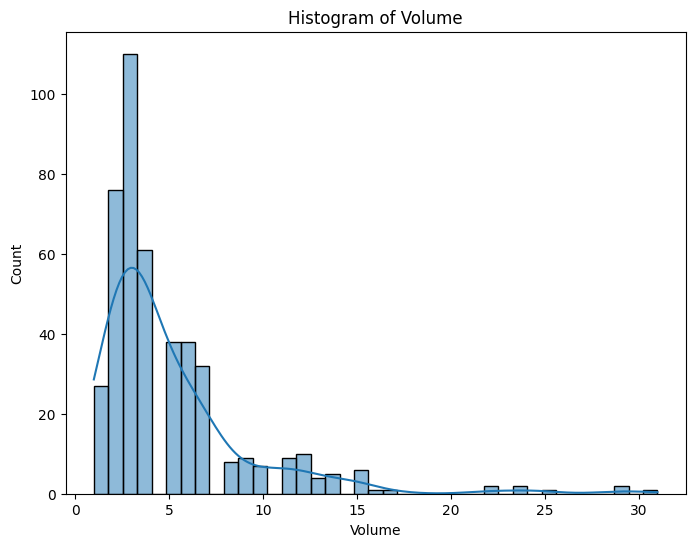

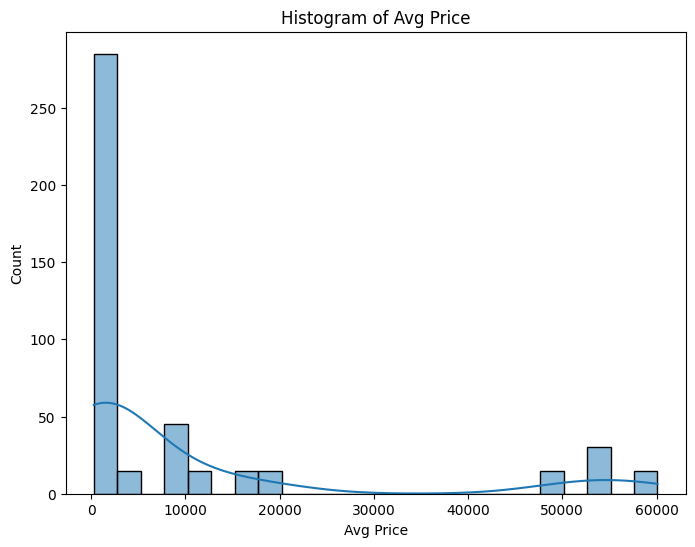

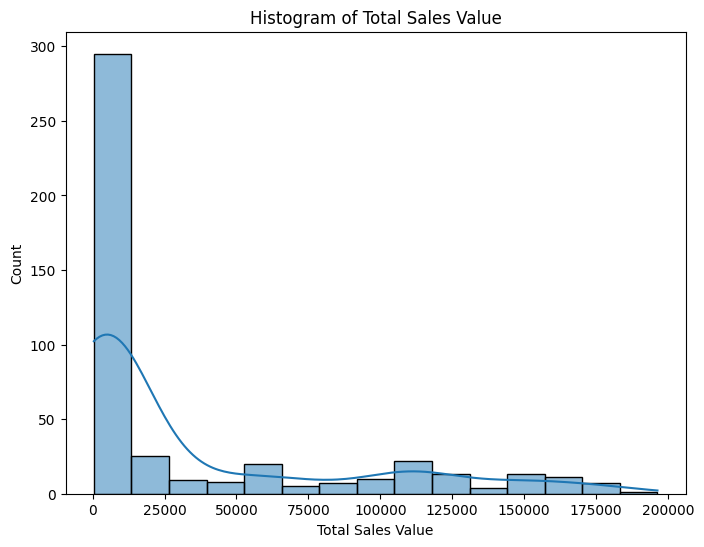

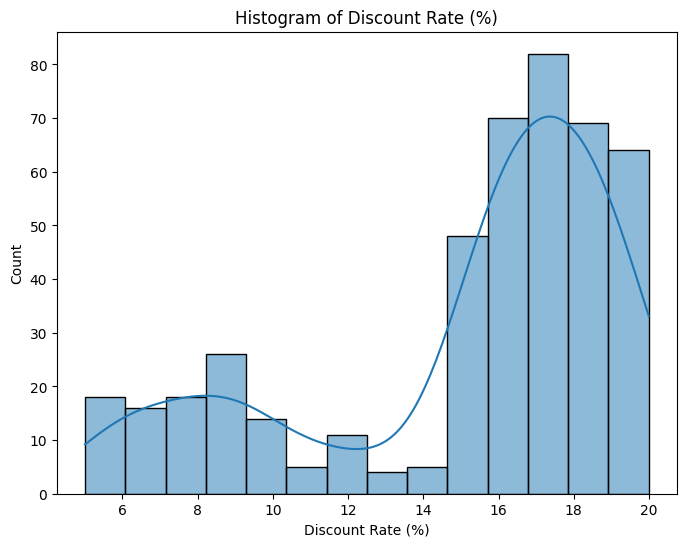

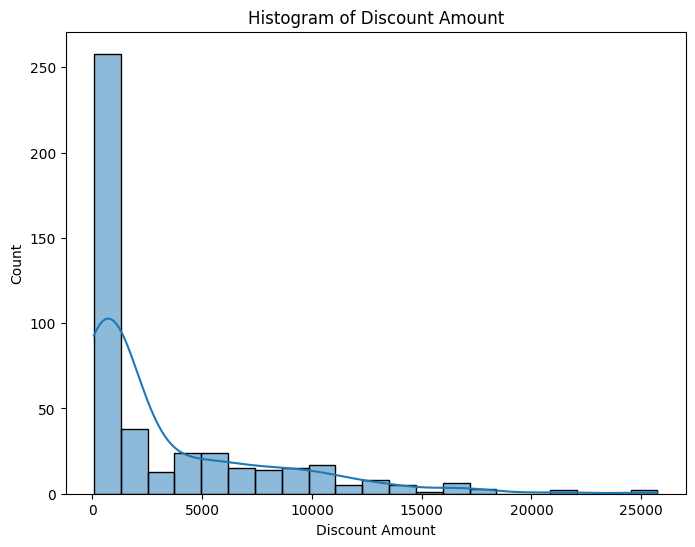

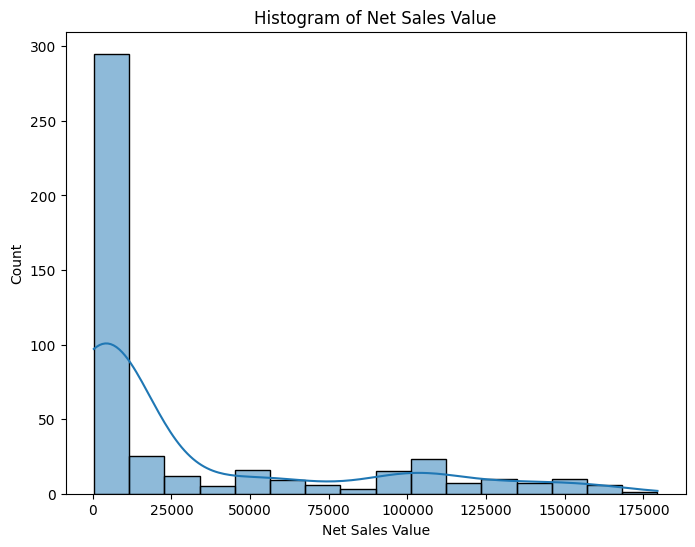

In [14]:
numerical_cols = sales.select_dtypes(include=['int', 'float']).columns
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.histplot(sales[col], kde=True)
  plt.title(f"Histogram of {col}")
  plt.show()

Distribution Analysis :

Skewness: There is No Symmetrical Distrubution in these Histrogram For Numerical Columns. The Histogram of Five Numerical columns are Right-skewed distribution ,They are Volume,Average Sale ,Total Sales Value,Discount Amount,Net Sales Value. There is only One Histogram of Nemrical Column is Left-skewed distribution That is Discount Rate(%)

Outliers: All The histogram shows clear extreme values,So There is a Presence of Outliers in All Histogram of Numerical columns

● Boxplots: Create boxplots for numerical variables to identify outliers and the interquartile range. Discuss any findings, such as extreme values or unusual distributions.

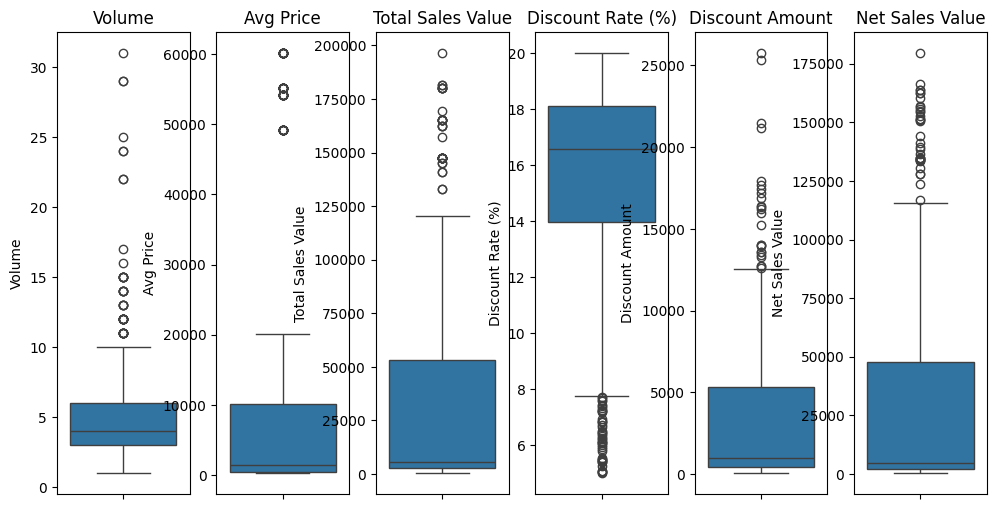

In [15]:
numerical_cols = sales.select_dtypes(include=['int', 'float']).columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
  plt.subplot(1, len(numerical_cols), i+1)
  sns.boxplot(sales[col])
  plt.title(col)
plt.show()

● Bar Chart Analysis for Categorical Column: Identify categorical columns in the dataset. Create bar charts to visualize the frequency or count of each category. Analyze the distribution of categories and provide insights.

In [16]:
# Identify categorical columns
categorical_cols = sales.select_dtypes(include=['object']).columns
categorical_cols

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

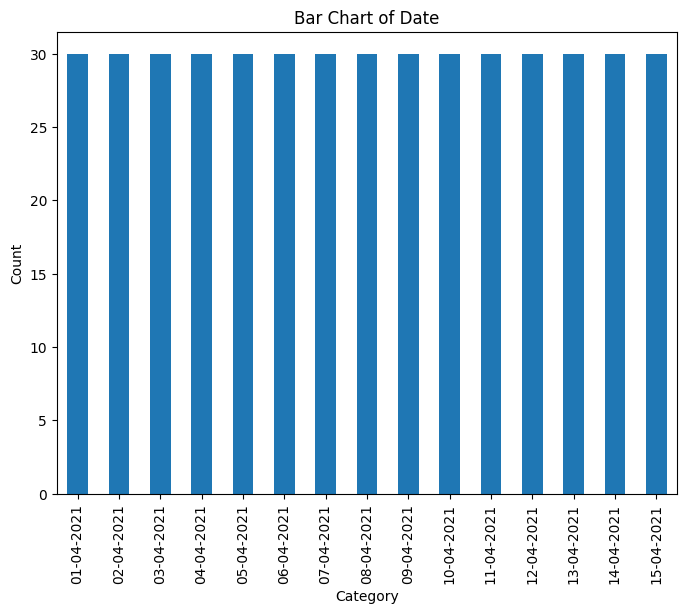

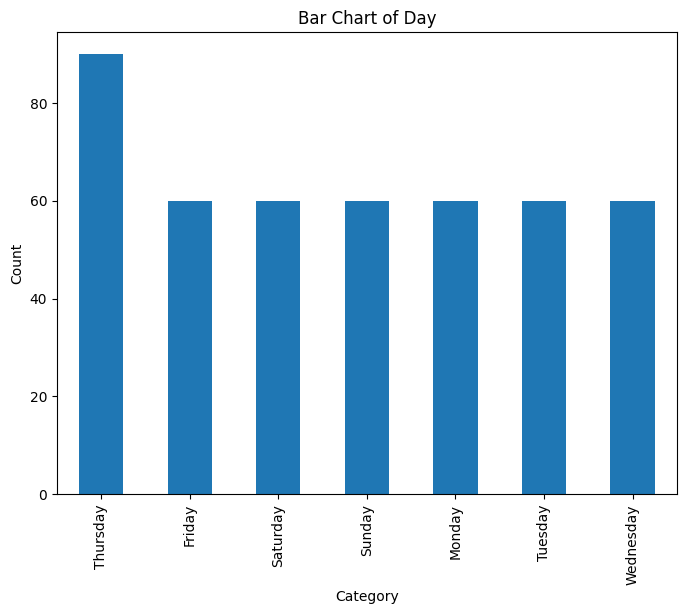

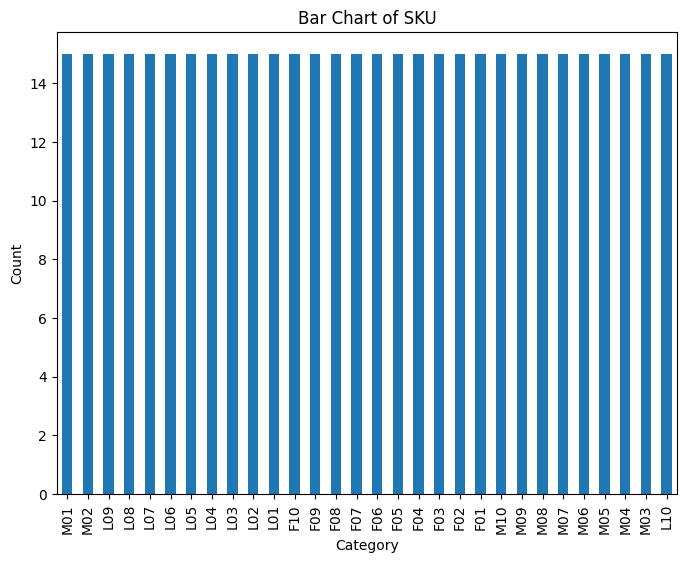

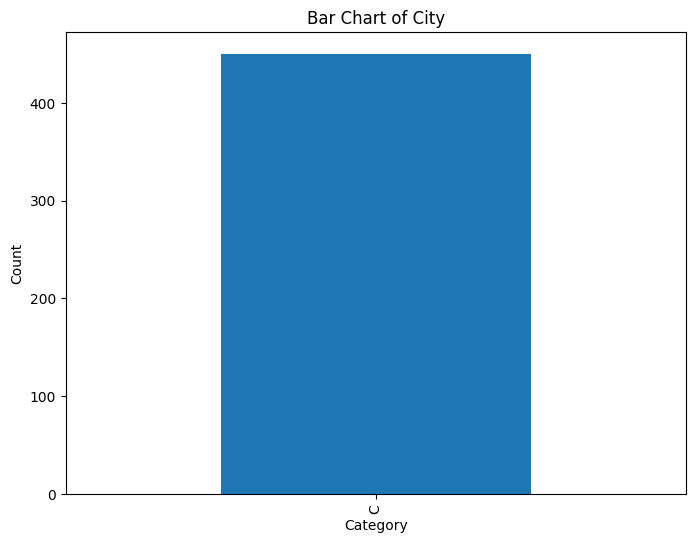

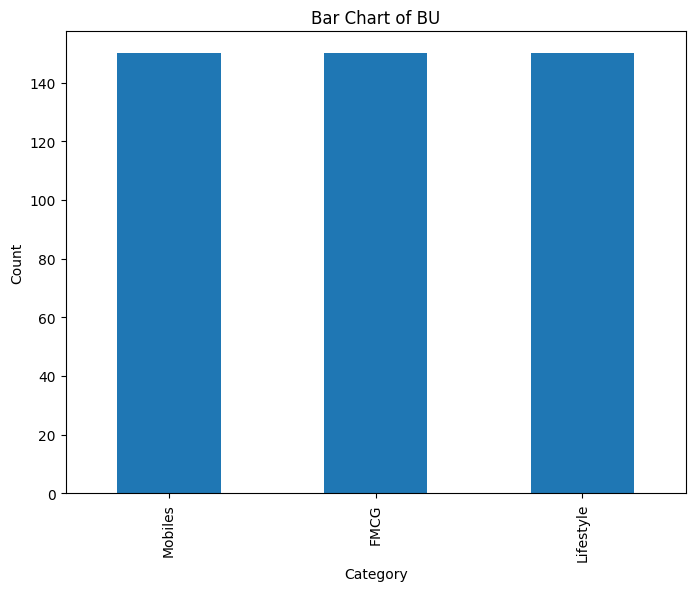

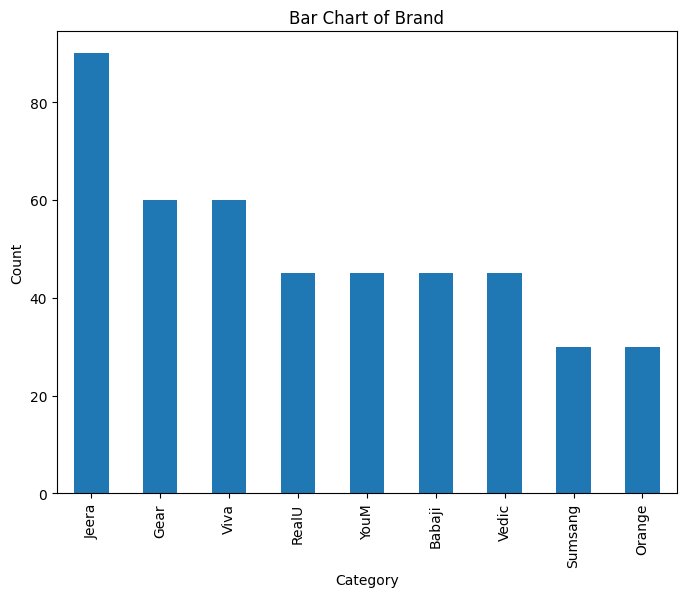

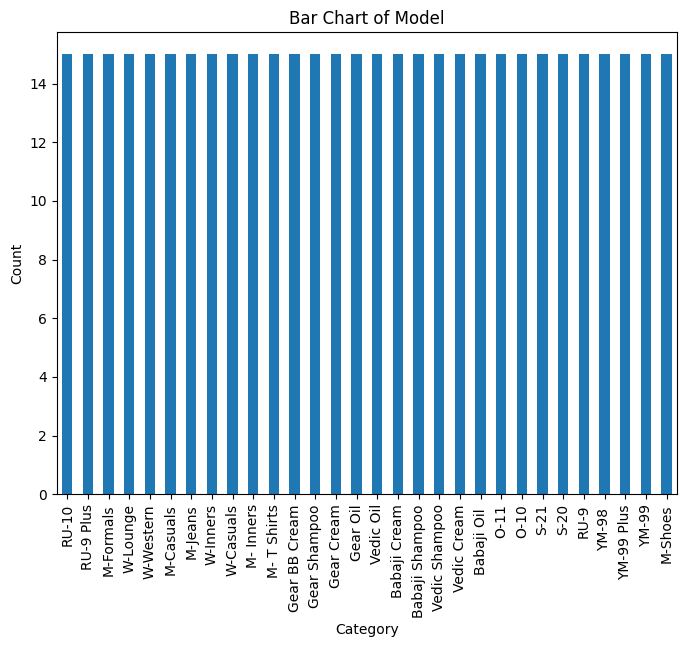

In [17]:
# Create bar charts for categorical columns
for col in categorical_cols:
  plt.figure(figsize=(8, 6))
  sales[col].value_counts().plot(kind='bar')
  plt.title(f"Bar Chart of {col}")
  plt.xlabel("Category")
  plt.ylabel("Count")
  plt.show()

Insights- Category frequency: Bar chart of Brand have the highest and lowest frequencies. Bar chart of City have an rare and single Category frequencies.

Category distribution: Bar chart of Model,BU,SKU and Date are Evenly distributed.
Standardization of Numerical Variables

● Objective: To scale numerical variables for uniformity, improving the dataset’s suitability for analytical models.

● Steps: - Explain the concept of standardization (z-score normalization). Standardize the numerical columns using the formula: z=x-mu/sigma.

- Show before and after comparisons of the data distributions.

Standardization transforms numerical variables to have a mean of 0 and a standard deviation of 1, ensuring uniformity and improving model performance. This process is also known as z-score normalization.

Formula:

z = (x - μ) / σ

where: z = standardized value x = original value μ = mean σ = standard deviation

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [19]:
numerical_cols = sales.select_dtypes(include=['int', 'float']).columns
numerical_cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [20]:
# Standardize numerical columns
for col in numerical_cols:
  mean = sales[col].mean()
  std = sales[col].std()
  sales[f"{col}_standardized"] = (sales[col] - mean) / std


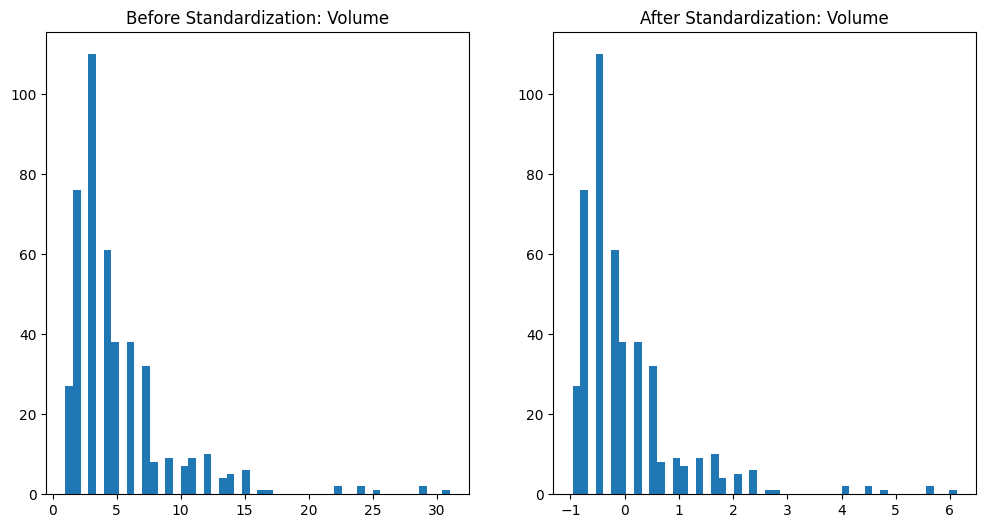

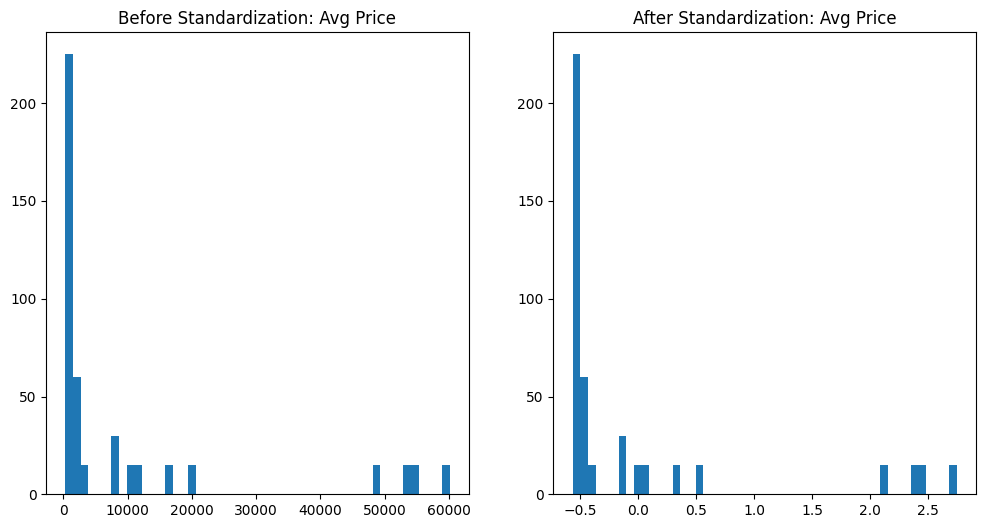

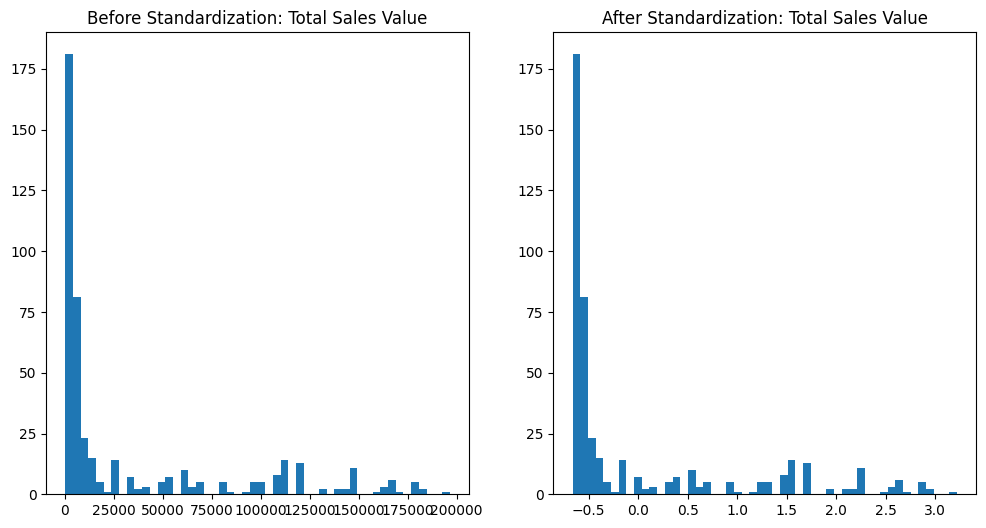

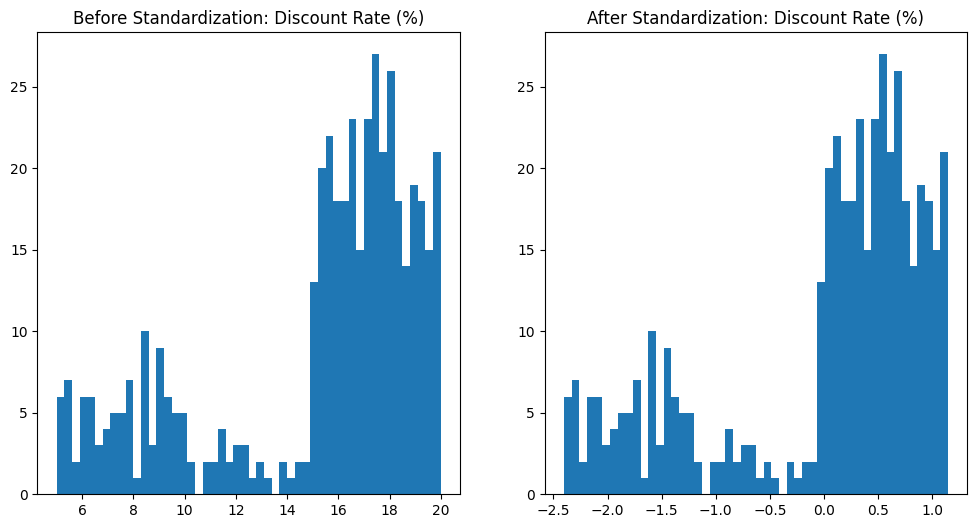

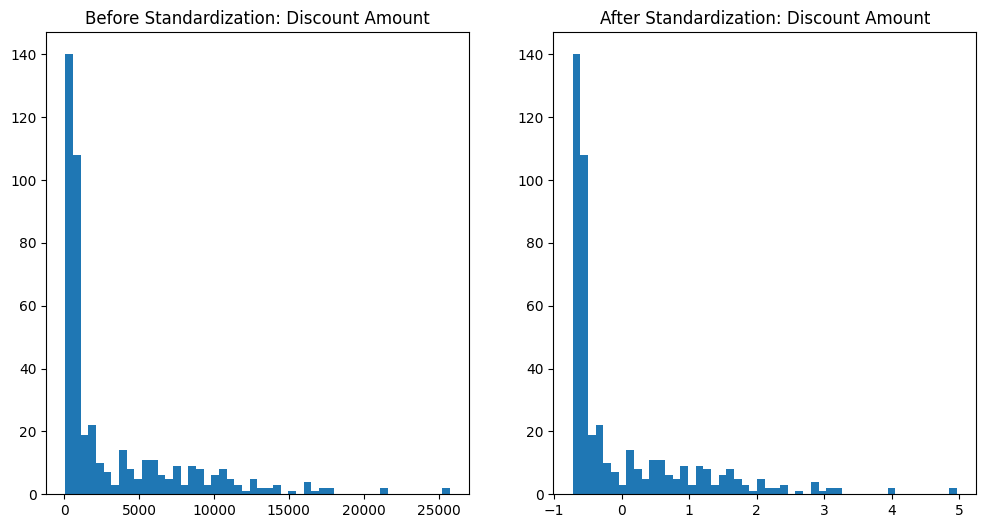

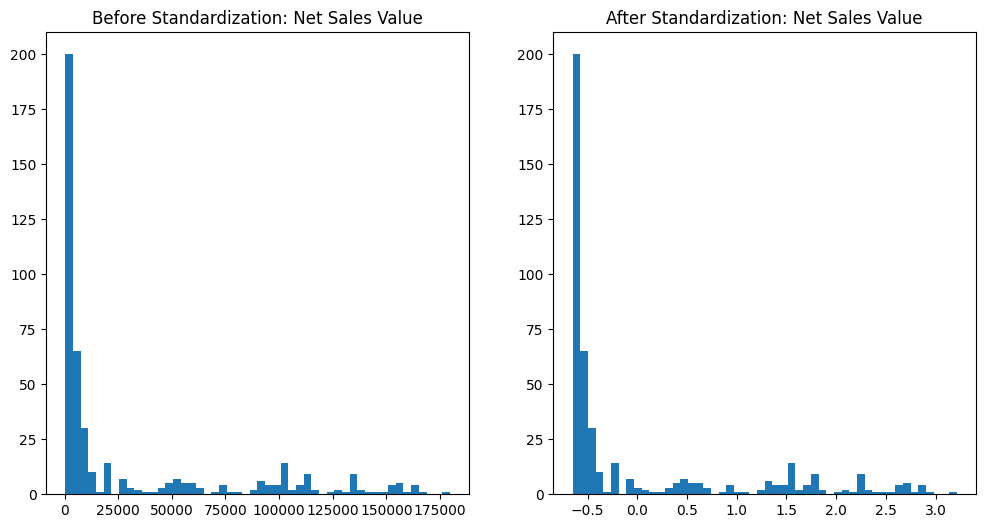

In [21]:
# Before and after comparisons of data distributions
for col in numerical_cols:
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.hist(sales[col], bins=50)
  plt.title(f"Before Standardization: {col}")
  plt.subplot(1, 2, 2)
  plt.hist(sales[f"{col}_standardized"], bins=50)
  plt.title(f"After Standardization: {col}")
  plt.show()


Conversion of Categorical Data into Dummy Variables

● Objective: To transform categorical variables into a format that can be provided to ML algorithms.

● Steps: Discuss the need for converting categorical data into dummy variables (one-hot encoding). Apply one-hot encoding to the categorical columns, creating binary (0 or 1) columns for each category. Display a portion of the transformed dataset.

Categorical data can't be directly fed into Machine Learning (ML) algorithms because they require numerical input. One-hot encoding transforms categorical variables into binary columns, enabling ML algorithms to process them.

One-Hot Encoding:

Create binary columns for each category, where:

1 represents the presence of a category
0 represents the absence of a category

In [22]:
from google.colab import files
uploaded=files.upload()

Saving sales_data_with_discounts.csv to sales_data_with_discounts (1).csv


In [23]:
Sales=pd.read_csv('sales_data_with_discounts.csv')
Sales

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [24]:
# Identify categorical columns
categorical_cols = Sales.select_dtypes(include=['object']).columns
categorical_cols



Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

In [25]:

# Apply one-hot encoding to categorical columns
data = pd.get_dummies(Sales, columns=['Day','Date','SKU','City','BU','Brand','Model'])
data



,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
446,6,2600,15600,17.057027,2660.896242,12939.103758,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
447,2,1600,3200,18.965550,606.897606,2593.102394,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
448,3,1900,5700,16.793014,957.201826,4742.798174,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
# Display a portion of the transformed dataset
print(data.head())



   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Day_Friday  Day_Monday  Day_Saturday  Day_Sunday  ...  \
0    160346.501180       False       False         False       False  ...   
1     89323.897039       False       False         False       False  ...   
2    102042.089843       False       False         False       False  ...   
3    112235.925298       False       False         False       False  ...   
4     19927.053770       False       False         False       False  ...   

   Model_Vedic Cream  Model_Vedic Oil  Model_Vedic Shampoo  Mo

Conclusion:

● Summarize the key findings from the descriptive analytics and data visualizations.

● Reflect on the importance of data preprocessing steps like standardization and one-hot encoding in data analysis and machine learning.

Key Findings:

Descriptive analytics and data visualizations revealed insights into the distribution of numerical and categorical variables, including central tendency, variability, and relationships between variables.
Importance of Data Preprocessing: - Ensuring uniformity and comparability of variables - Improving model performance and accuracy - Preventing feature dominance and bias - Enhancing interpretability of results

- Data preprocessing steps like standardization and one-hot encoding are crucial for:

Standardization transformed numerical variables to have a mean of 0 and a standard deviation of 1, improving model performance.
One-hot encoding converted categorical variables into binary columns, enabling machine learning algorithms to process them.
